In [ ]:
import seaborn as sns


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Covid Dataset (2).csv')

In [ ]:
df

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No


Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [ ]:
df = df.replace({'No': 0, 'Yes': 1})

In [ ]:
corr_df= df.corr()
corr_df.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [ ]:
df.drop('Wearing Masks',axis= 1,inplace= True)
df.drop('Sanitization from Market',axis= 1,inplace= True)
df.drop('Running Nose',axis=1,inplace= True)
df.drop('Asthma',axis=1,inplace= True)
df.drop('Chronic Lung Disease',axis=1,inplace= True)
df.drop('Headache',axis=1,inplace= True)
df.drop('Fatigue ',axis=1,inplace= True)
df.drop('Heart Disease',axis=1,inplace= True)
df.drop('Diabetes',axis=1,inplace= True)
df.drop('Gastrointestinal ',axis=1,inplace= True)

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   BreathingProblem                    5434 non-null   int64
 1   Fever                               5434 non-null   int64
 2   DryCough                            5434 non-null   int64
 3   Sorethroat                          5434 non-null   int64
 4   HyperTension                        5434 non-null   int64
 5   Abroadtravel                        5434 non-null   int64
 6   ContactwithCOVIDPatient             5434 non-null   int64
 7   AttendedLargeGathering              5434 non-null   int64
 8   VisitedPublicExposedPlaces          5434 non-null   int64
 9   FamilyworkinginPublicExposedPlaces  5434 non-null   int64
 10  COVID-19                            5434 non-null   int64
dtypes: int64(11)
memory usage: 467.1 KB


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
features = df[['BreathingProblem','Fever','DryCough','Sorethroat','HyperTension','Abroadtravel','ContactwithCOVIDPatient','AttendedLargeGathering','VisitedPublicExposedPlaces','FamilyworkinginPublicExposedPlaces']]
label = df['COVID-19']

In [ ]:
train_x_df,test_x_df, train_y_df, test_y_df = train_test_split(features,label,test_size=0.30,random_state=10)
train_df = pd.concat([train_x_df,train_y_df],axis=1)
test_df = pd.concat([test_x_df,test_y_df],axis=1)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3803 entries, 1102 to 1289
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   BreathingProblem                    3803 non-null   int64
 1   Fever                               3803 non-null   int64
 2   DryCough                            3803 non-null   int64
 3   Sorethroat                          3803 non-null   int64
 4   HyperTension                        3803 non-null   int64
 5   Abroadtravel                        3803 non-null   int64
 6   ContactwithCOVIDPatient             3803 non-null   int64
 7   AttendedLargeGathering              3803 non-null   int64
 8   VisitedPublicExposedPlaces          3803 non-null   int64
 9   FamilyworkinginPublicExposedPlaces  3803 non-null   int64
 10  COVID-19                            3803 non-null   int64
dtypes: int64(11)
memory usage: 356.5 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 1094 to 3032
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   BreathingProblem                    1631 non-null   int64
 1   Fever                               1631 non-null   int64
 2   DryCough                            1631 non-null   int64
 3   Sorethroat                          1631 non-null   int64
 4   HyperTension                        1631 non-null   int64
 5   Abroadtravel                        1631 non-null   int64
 6   ContactwithCOVIDPatient             1631 non-null   int64
 7   AttendedLargeGathering              1631 non-null   int64
 8   VisitedPublicExposedPlaces          1631 non-null   int64
 9   FamilyworkinginPublicExposedPlaces  1631 non-null   int64
 10  COVID-19                            1631 non-null   int64
dtypes: int64(11)
memory usage: 152.9 KB


In [ ]:
import tensorflow_decision_forests as tfdf

Training

In [ ]:
train_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="COVID-19")
test_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="COVID-19")

In [ ]:
tfdf.keras.get_all_models() 

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel]

In [ ]:
model = tfdf.keras.RandomForestModel(num_trees=150)
model.fit(train_tf)
model.compile(metrics=["accuracy"])
model.evaluate(test_tf)

26/26 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.8148


[0.0, 0.8148375153541565]

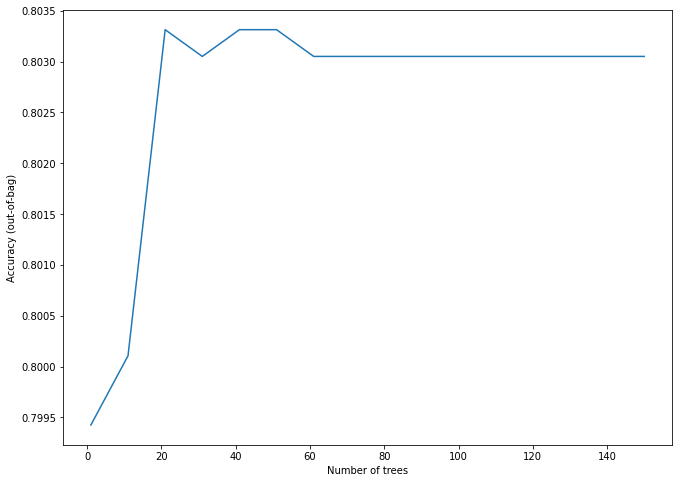

In [ ]:
import matplotlib.pyplot as plt
model.make_inspector().evaluation()

logs = model.make_inspector().training_logs()

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.show()

In [ ]:
model_1 = tfdf.keras.GradientBoostedTreesModel(num_trees=100)
model_1.fit(train_tf)

model_1.compile(metrics=["accuracy"])
acc = model_1.evaluate(test_tf)
print('Accuracy: '+str(acc[1]*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9693
Accuracy: 96.93439602851868


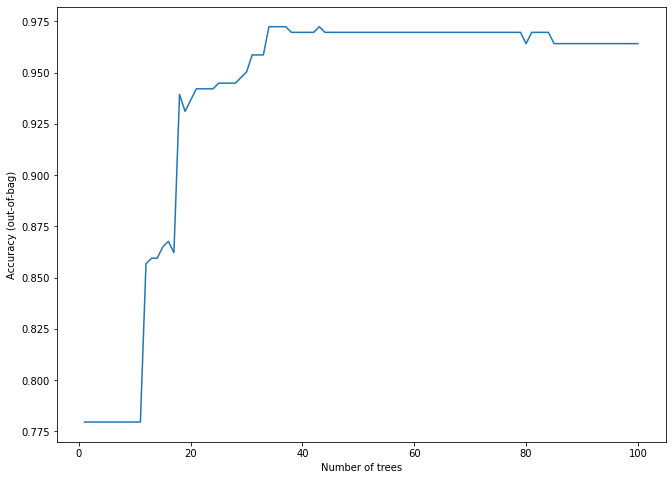

In [ ]:
import matplotlib.pyplot as plt
model_1.make_inspector().evaluation()

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.show()


In [ ]:
model_3 = tfdf.keras.CartModel()
model_3.fit(train_tf)
model_3.compile(metrics=["accuracy"])
acc = model_3.evaluate(test_tf)
print('Accuracy: '+str(acc[1]*100))

26/26 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.9638
Accuracy: 96.38258814811707


In [ ]:
train_x,test_x, train_y, test_y = train_test_split(features,label,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x,train_y)
y_pred = model.predict(test_x)

from sklearn.metrics import accuracy_score

accuracy_score(test_y, y_pred)
print('Accuracy: '+str(accuracy_score(test_y, y_pred)*100))

Accuracy: 97.148114075437


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
test_x.head(1)

,BreathingProblem,Fever,DryCough,Sorethroat,HyperTension,Abroadtravel,ContactwithCOVIDPatient,AttendedLargeGathering,VisitedPublicExposedPlaces,FamilyworkinginPublicExposedPlaces
1094,1,1,1,1,0,1,1,0,1,0


In [ ]:
np.array([1,1,1,1,0,1,1,1,1,1,1,1,1,1]).reshape(1,-1)

array([[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [ ]:
train_x.columns

Index(['BreathingProblem', 'Fever', 'DryCough', 'Sorethroat', 'HyperTension',
       'Abroadtravel', 'ContactwithCOVIDPatient', 'AttendedLargeGathering',
       'VisitedPublicExposedPlaces', 'FamilyworkinginPublicExposedPlaces'],
      dtype='object')